In [3]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
# csvファイルの読み込み
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
# データの詳細を出力
df_train.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,3.409589,2.866438,443.639726,46.549315,0.425342,0.057534,567.240411,21.954110,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.004110,0.995890,0.999315,0.000685,180921.195890
std,386.587738,436.528436,29.317331,0.815778,456.098091,161.319273,0.518911,0.238753,441.866955,61.119149,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.063996,0.063996,0.026171,0.026171,79442.502883
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,882.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,223.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,129975.000000
50%,1087.000000,0.000000,0.000000,3.000000,383.500000,0.000000,0.000000,0.000000,477.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,163000.000000
75%,1391.250000,728.000000,0.000000,3.000000,712.250000,0.000000,1.000000,0.000000,808.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,214000.000000
max,4692.000000,2065.000000,508.000000,8.000000,5644.000000,1474.000000,3.000000,2.000000,2336.000000,552.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,755000.000000


In [6]:
# 相関係数行列を確認
a = df_train.corr()

In [7]:
# 目的変数であるSalePriceの相関係数を抽出する
# s = df_train.corr()["SalePrice"]

In [8]:
# SalePriceの相関係数を昇順にsortする
# so = sorted(s)

In [9]:
# 目的変数であるSalePriceの相関係数を昇順にする
a1 = a.sort_values(by = ["SalePrice"], ascending=True)
a1.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,SalePrice
ExterQual_TA,-0.312844,-0.188984,-0.025626,0.036360,-0.128084,0.075127,-0.096217,0.076137,-0.282823,0.130818,...,-0.002482,-0.026643,-0.335148,0.035483,0.240734,-0.015958,0.015958,-0.020472,0.020472,-0.589044
KitchenQual_TA,-0.273566,-0.182739,-0.010519,0.017080,-0.108876,0.061258,-0.102007,0.032787,-0.218945,0.090396,...,-0.012126,-0.012126,-0.274335,0.045067,0.178612,0.042386,-0.042386,0.026360,-0.026360,-0.519298
BsmtQual_TA,-0.222508,-0.150144,-0.024260,0.089043,-0.121785,0.112889,-0.098442,0.067341,-0.122083,0.193447,...,0.018342,0.018342,-0.265143,-0.010153,0.161940,0.028718,-0.028718,-0.029266,0.029266,-0.452394
GarageFinish_Unf,-0.253960,-0.081906,-0.052794,0.009897,-0.179000,0.035795,-0.137590,0.053548,-0.128658,0.158564,...,-0.001712,-0.001712,-0.238934,-0.007466,0.172316,-0.010569,0.010569,0.022023,-0.022023,-0.410608
MasVnrType_None,-0.325566,-0.019491,-0.042266,-0.065965,-0.235217,0.071079,-0.116849,-0.039176,-0.121476,0.156023,...,0.000980,0.024834,-0.172209,0.037687,0.132540,0.009787,-0.009787,0.031521,-0.031521,-0.374468


In [10]:
# 目的変数であるSalePriceと説明変数の相関係数を抽出する
sort_SalePrice_corr = a1["SalePrice"]
sort_SalePrice_corr

ExterQual_TA            -0.589044
KitchenQual_TA          -0.519298
BsmtQual_TA             -0.452394
GarageFinish_Unf        -0.410608
MasVnrType_None         -0.374468
GarageType_Detchd       -0.354141
Foundation_CBlock       -0.343263
HeatingQC_TA            -0.312677
MSZoning_RM             -0.288065
LotShape_Reg            -0.267672
BsmtExposure_No         -0.263600
CentralAir_N            -0.251328
SaleType_WD             -0.242598
RoofStyle_Gable         -0.224744
PavedDrive_N            -0.212630
Foundation_BrkTil       -0.204117
Electrical_FuseA        -0.193978
Neighborhood_OldTown    -0.192189
Neighborhood_NAmes      -0.188513
Neighborhood_Edwards    -0.179949
Exterior1st_MetalSd     -0.167068
Neighborhood_IDOTRR     -0.164056
HouseStyle_1.5Fin       -0.163466
Exterior2nd_MetalSd     -0.162389
Exterior2nd_Wd Sdng     -0.161800
Exterior1st_Wd Sdng     -0.158619
KitchenQual_Fa          -0.157199
SaleCondition_Normal    -0.153990
Neighborhood_BrkSide    -0.143648
ExterCond_Fa  

In [11]:
# 相関係数を絶対値の昇順にして確認する
sort_abs_SalePrice_corr = sorted(abs(a1["SalePrice"]))
sort_abs_SalePrice_corr[-6:]

[0.61358055155919444,
 0.62343143891835984,
 0.64040919725834899,
 0.70862447761265113,
 0.79098160058380473,
 1.0]

In [12]:
# 相関係数が大きい説明変数が分かった
# 説明変数GarageArea, GarageCars, GrLivArea, OverallQualの4つを用いる
# 特徴量の数が多いので､locメソッドで一部の特徴量のみを選択
df_train_pickup = df_train.loc[:, ['GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 'SalePrice']]

In [13]:
# データが選択できているか確認
df_train_pickup.head()

,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,548.0,2.0,1710.0,7.0,208500
1,460.0,2.0,1262.0,6.0,181500
2,608.0,2.0,1786.0,7.0,223500
3,642.0,3.0,1717.0,7.0,140000
4,836.0,3.0,2198.0,8.0,250000


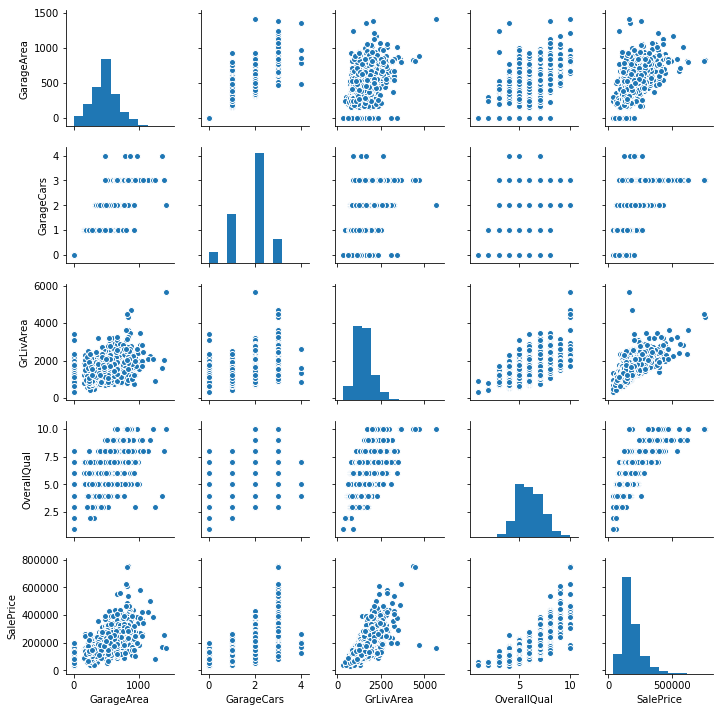

In [14]:
# 散布図行列を出力
import seaborn as sns
sns.pairplot(df_train_pickup, size=2.0)
plt.show()

In [15]:
# GarageCarsのデータの詳細を確認
df_train["GrLivArea"].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [16]:
# OverallQualのデータの詳細を確認
df_train["OverallQual"].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [17]:
# 4つの説明変数のうちGrLivAreaとOverallQualを選択し重回帰分析を行う。
# 散布図を見ると直線的な傾向よりも曲線的な傾向の方が見られる。
# 重回帰分析よりも多項式回帰が適切か？今回は学習のために重回帰分析で予測を行う。

In [18]:
# trainデータを確認
df_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,SalePrice
0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,208500
1,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,181500
2,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,223500
3,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,272.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,140000
4,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,250000


In [19]:
# testデータを確認
df_test.head()

,Id,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,1461,896,0,0,2,468,144,0,0,270,...,0,0,0,0,0,1,0,1,1,0
1,1462,1329,0,0,3,923,0,0,0,406,...,0,0,0,0,0,1,0,1,1,0
2,1463,928,701,0,3,791,0,0,0,137,...,0,0,0,0,0,1,0,1,1,0
3,1464,926,678,0,3,602,0,0,0,324,...,0,0,0,0,0,1,0,1,1,0
4,1465,1280,0,0,2,263,0,0,0,1017,...,0,0,0,0,0,1,0,1,1,0


In [20]:
# trainデータを用意
# DataFrameの.valuesメソッドでarrayに変換する
X = df_train.loc[:,["GrLivArea", "OverallQual"]].values
X[:10]

array([[ 1710.,     7.],
       [ 1262.,     6.],
       [ 1786.,     7.],
       [ 1717.,     7.],
       [ 2198.,     8.],
       [ 1362.,     5.],
       [ 1694.,     8.],
       [ 2090.,     7.],
       [ 1774.,     7.],
       [ 1077.,     5.]])

In [21]:
# testデータを用意
# DataFrameの.valuesメソッドでarrayに変換する
y = df_train.loc[:,["SalePrice"]].values
y[:10]

array([[208500],
       [181500],
       [223500],
       [140000],
       [250000],
       [143000],
       [307000],
       [200000],
       [129900],
       [118000]])

In [22]:
# ホールド・アウト法によるデータの分割
# (X, y, テストにどの割合を割くか, 分割のしかたを決める乱数生成器)
# テストデータの割合は、test_size引数に指定することで変更可能です（今回は、train:test = 7:3）
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [23]:
# データ全体のサンプル数を確認
print(X.shape)
print(y.shape)

(1460, 2)
(1460, 1)


In [24]:
# trainデータのサンプル数を確認
print(X_train.shape)
print(y_train.shape)

(1022, 2)
(1022, 1)


In [25]:
# testデータのサンプル数を確認
print(X_test.shape)
print(y_test.shape)

(438, 2)
(438, 1)


In [26]:
# 重回帰の線形回帰を実行
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [27]:
# 重回帰線形モデルの学習
# trainデータのみを用いていることに注意
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
submission = pd.DataFrame()
submission['Id'] = df_test.Id

In [74]:
X1 = df_test.loc[:,["GrLivArea", "OverallQual"]].values
X1[:10]

array([[ 896,    5],
       [1329,    6],
       [1629,    5],
       [1604,    6],
       [1280,    8],
       [1655,    6],
       [1187,    6],
       [1465,    6],
       [1341,    7],
       [ 882,    4]])

In [75]:
predictions = lr.predict(X1)

In [76]:
submission['SalePrice'] = predictions
submission.head()

,Id,SalePrice
0,1461,108157.209463
1,1462,166236.519043
2,1463,153140.377553
3,1464,183112.878150
4,1465,226242.888815


In [78]:
submission.to_csv('submission1.csv', index=False)

In [27]:
# 定数項を出力
lr.intercept_

array([-87307.55336357])

In [28]:
# 偏回帰係数を出力
# [GarageCarsの係数, OverallQualの係数]
lr.coef_

array([[ 30239.25075522,  35291.49789569]])

In [29]:
# モデルの性能評価

In [30]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [31]:
# 自由度調整済み決定係数を出力
print('adjusted R^2')
print('train: %3f' % adjusted(lr.score(X_train, y_train), len(y_train), 2))
print('test : %3f' % adjusted(lr.score(X_test, y_test), len(y_test), 2))

adjusted R^2
train: 0.665740
test : 0.669501


In [32]:
## 決定係数から、学習させたモデルはあまり当てはまりが良くない。
## やっぱり多項式回帰で予測するのが良いか？？

In [33]:
from sklearn.metrics import mean_squared_error as mse
print('RMSE')
print('train: %.3f' % (mse(y_train, lr.predict(X_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, lr.predict(X_test)) ** (1/2)))

RMSE
train: 45110.009
test : 47259.802


In [34]:
# 基本統計量をもう一度確認
df_train.describe()["SalePrice"]

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [35]:
## 標準偏差の値よりもRMSEの値が小さく25%~75%のあたりに位置するのかな？？

In [36]:
# 残差プロットを行う関数を定義
def res_plot(y_train, y_train_pred, y_test, y_test_pred):
    # train, testごとに残差を算出
    res_train = y_train_pred - y_train
    res_test  = y_test_pred - y_test
    
    # train, testごとに(予測値, 残差)をプロット
    plt.figure(figsize=(8, 8))
    plt.scatter(y_train_pred, res_train, color='blue', marker='o', label='train', alpha=0.5)
    plt.scatter(y_test_pred, res_test, color='green', marker='s', label='test', alpha=0.5)
    
    plt.xlabel('Predicted Values')                  # x軸のラベルを表示
    plt.ylabel('Residuals')                         # y軸のラベルを表示
    plt.legend(loc='upper left')                    # 凡例を左上に表示
    plt.hlines(y=0, xmin=-200000, xmax=500000, color='red') # 残差0の線を表示
    plt.xlim([-200000, 500000])                             # 表示する横軸の範囲を指定
    plt.show()

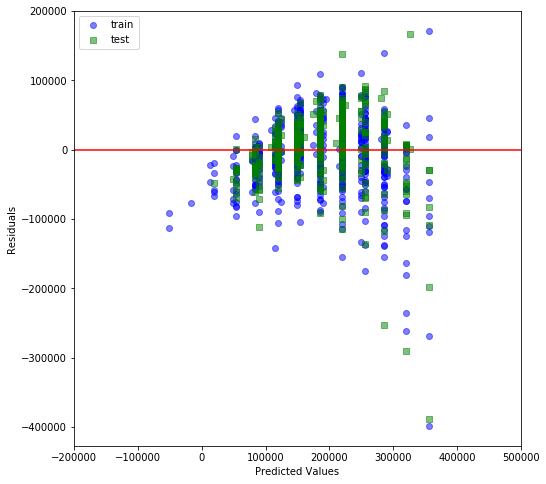

In [37]:
# 残差プロットを出力
res_plot(y_train, lr.predict(X_train), y_test, lr.predict(X_test))

In [38]:
## x軸が最も高い時に外れ値が多数
## x軸が最も低い時も外れ値が多数

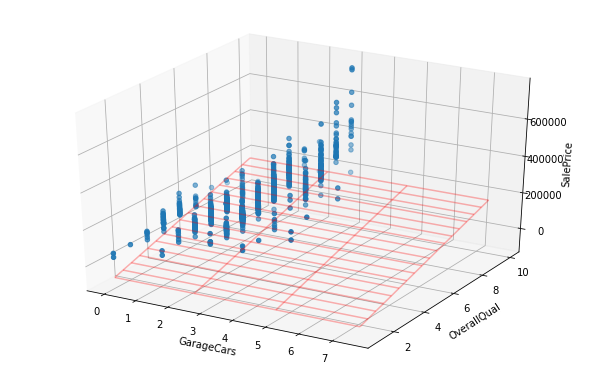

In [79]:
# 3次元のプロットをするためのライブラリを読み込み
from mpl_toolkits.mplot3d import Axes3D

# Axes3Dのインスタンスを生成
ax = Axes3D(plt.figure(figsize=(8, 5)))

# 3次元の散布図を出力
# (x軸, y軸 , z軸)
ax.scatter3D(df_train['GarageCars'], df_train['OverallQual'], df_train['SalePrice'])

# # 回帰平面の方程式を定義
X_grid, Y_grid = np.meshgrid(np.arange(0, 8, 2.5), np.arange(1, 10, 0.5))
w0 = lr.intercept_
w1 = lr.coef_[0, 0]
w2 = lr.coef_[0, 1]
Z = w0 + w1*X_grid + w2*Y_grid

# 回帰平面を表示
ax.plot_wireframe(X_grid, Y_grid, Z, alpha=0.3, color='red')

# 座標軸のラベルを指定
ax.set_xlabel('GarageCars')
ax.set_ylabel('OverallQual')
ax.set_zlabel('SalePrice')

# ここまでの内容でグラフをプロット
plt.show()

In [40]:
# 変数の標準化を実行
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_std = ss.fit_transform(df_train) # すべての説明変数を変換
y_std = ss.fit_transform(y)

/Users/furukawakoichi/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [41]:
# 標準化された説明変数を確認
X_std[:5]

array([[-0.79343379,  1.16185159, -0.11633929, ...,  0.02618016,
        -0.02618016,  0.34727322],
       [ 0.25714043, -0.79516323, -0.11633929, ...,  0.02618016,
        -0.02618016,  0.00728832],
       [-0.62782603,  1.18935062, -0.11633929, ...,  0.02618016,
        -0.02618016,  0.53615372],
       [-0.52173356,  0.93727612, -0.11633929, ...,  0.02618016,
        -0.02618016, -0.51528106],
       [-0.04561126,  1.61787729, -0.11633929, ...,  0.02618016,
        -0.02618016,  0.8698426 ]])

In [42]:
# 標準化された目的変数を確認
y_std[:10]

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       [-0.51528106],
       [ 0.8698426 ],
       [-0.47750496],
       [ 1.5875885 ],
       [ 0.24024094],
       [-0.6424606 ],
       [-0.79230579]])

In [43]:
# 標準化した説明変数の平均を確認
# arrayのmean()メソッドで出力できる
X_std.mean()

1.7909929494352421e-16

In [44]:
# 標準化した目的変数の平均を確認
# arrayのmean()メソッドで出力できる
y_std.mean()

1.3626846987180004e-16

In [45]:
# 標準化した説明変数の標準偏差を確認
# arrayのstd()メソッドで出力できる
X_std.std()

1.0

In [46]:
# 標準化した目的変数の標準偏差を確認
# arrayのmean()メソッドで出力できる
y_std.std()

0.99999999999999978

In [47]:
# 標準化したデータで線形モデルを学習させる
lr_std = LinearRegression()
lr_std.fit(X_std, y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
# 標準偏回帰係数を出力
lr_std_coef = lr_std.coef_
lr_std_coef

array([[ -2.28033248e-06,  -2.57491346e-06,   6.24500451e-17,
         -4.18502039e-17,  -3.04075868e-04,  -1.07549887e-04,
         -1.22298005e-16,  -6.93889390e-17,  -2.94588118e-04,
         -1.64798730e-17,  -2.98372438e-16,  -1.04083409e-16,
         -5.20417043e-16,   2.08166817e-16,  -3.64291930e-16,
          3.09960681e-06,   1.66533454e-16,   2.22044605e-16,
          5.89805982e-17,   1.94289029e-16,  -2.86808869e-07,
          6.07153217e-17,   0.00000000e+00,  -5.76795556e-17,
          1.69135539e-17,   1.04083409e-17,   5.77662918e-16,
         -2.35922393e-16,  -2.77555756e-16,   3.64291930e-17,
         -5.55111512e-17,   2.92480291e-04,  -1.52655666e-16,
          2.06432094e-16,  -1.59594560e-16,  -1.33573708e-16,
         -2.37128663e-03,  -9.22349418e-04,  -1.18577289e-03,
         -1.08172700e-03,  -1.71661725e-03,  -4.89141790e-04,
         -5.83705888e-04,  -1.04675261e-04,  -8.56731573e-04,
          2.67147415e-16,   2.01227923e-16,   5.46004214e-16,
        

In [49]:
type(lr_std.coef_)

numpy.ndarray

In [50]:
# 標準編回帰係数を昇順で並び替える
b = sorted(lr_std_coef[0])

In [51]:
b

[-0.0034147357672563404,
 -0.0034071742355352187,
 -0.0023712866309252879,
 -0.0020622143325941455,
 -0.0017166172494273799,
 -0.0012998064114377941,
 -0.0012263329826829629,
 -0.0011857728868869665,
 -0.0010817269991253778,
 -0.0010348751838562334,
 -0.00099749602924549194,
 -0.00096969518205841133,
 -0.00095092943152771253,
 -0.00092234941769702133,
 -0.00087406258689277927,
 -0.00085673157253807718,
 -0.00085635298272747871,
 -0.00082315649005152173,
 -0.00077768775979631527,
 -0.00077480182851656469,
 -0.0007539643864225903,
 -0.00073673022473903955,
 -0.00070740802560644023,
 -0.00069769367040669467,
 -0.00068864590286605784,
 -0.00068334317806383179,
 -0.0006282321733063756,
 -0.00059266045772424485,
 -0.00058370588779479548,
 -0.00056685068727228317,
 -0.00056407812433485055,
 -0.00054328922289388192,
 -0.00054177399956538766,
 -0.00052640811078995937,
 -0.00048914179023646709,
 -0.0004777401102604717,
 -0.00047501706641696687,
 -0.00046667543836295851,
 -0.000439761817504946,
 

In [52]:
# 最も高い標準編回帰係数の2つの変数のindexを知る
index_1 = np.where(lr_std_coef == -0.0034147357672563404)
index_2 = np.where(lr_std_coef == -0.0034071742355352187)
index_3 = np.where(lr_std_coef == -0.0023712866309252879)
print(index_1)
print(index_2)
print(index_3)

(array([0]), array([131]))
(array([0]), array([130]))
(array([0]), array([36]))


In [53]:
# index69, 162の変数を求める

In [54]:
print(df_train.corr().index[131])
print(df_train.corr().index[130])
print(df_train.corr().index[36])

Foundation_PConc
Foundation_CBlock
BldgType_1Fam
